In [1]:
import scipy.linalg
import scipy.optimize
import sys
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scripts.theodolite_function as tfu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.theodolite_utils as ttfu

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
def result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, path_file_type):
    dist_prism = []
    dist_prism_all = []
    for i,j,k in zip(Inter_distance, file_name_marker, file_name_path):
        m1, m2, m3, T_1, T_2, T_3 = tfu.read_marker_file(j, 1, 1)
        trimble_1 = ttfu.read_prediction_data_resection_csv_file(k+path_type+path_file_type+"1.csv")
        trimble_2 = ttfu.read_prediction_data_resection_csv_file(k+path_type+path_file_type+"2.csv")
        trimble_3 = ttfu.read_prediction_data_resection_csv_file(k+path_type+path_file_type+"3.csv")
        if(len(np.array(trimble_1)) > 0 and len(np.array(trimble_2)) > 0 and len(np.array(trimble_3)) > 0):
            p1 = np.array(trimble_1)[:,1:5]
            p2 = np.array(trimble_2)[:,1:5]
            p3 = np.array(trimble_3)[:,1:5]
            p1t = T_1@p1.T
            p2t = T_2@p2.T
            p3t = T_3@p3.T

            timestamp = trimble_1[:,0]
            for num in range(0,len(timestamp)-1):
                dp1 = abs(np.linalg.norm(p1t.T[num,0:3]-p2t.T[num,0:3])-i[0])*1000
                dp2 = abs(np.linalg.norm(p1t.T[num,0:3]-p3t.T[num,0:3])-i[1])*1000
                dp3 = abs(np.linalg.norm(p3t.T[num,0:3]-p2t.T[num,0:3])-i[2])*1000
                mdp = np.mean([dp1, dp2, dp3])
                dist_prism_all.append(dp1)
                dist_prism_all.append(dp2)
                dist_prism_all.append(dp3)
                dist_prism.append(np.array([timestamp[num], dp1, dp2, dp3, mdp]))
        else:
            print("No data in file(s) "+k+"  !!")
    print("Results done !")
    dist_prism = np.array(dist_prism)
    dist_prism_all = np.array(dist_prism_all)
    return dist_prism, dist_prism_all

In [3]:
# 17 02 2022 / 24 02 2022
Dist_prism_12_240222 = 0.8882613537922258
Dist_prism_13_240222 = 0.8262903370535766
Dist_prism_23_240222 = 1.0377436460567973
Dist_GPS_12_240222 = 0.7809786915630756
Dist_GPS_13_240222 = 0.8378323585433202
Dist_GPS_23_240222 = 0.5191788936274444   

# 07 03 2022
Dist_prism_12_070322 = 0.8832836583456264
Dist_prism_13_070322 = 0.8247449387008166
Dist_prism_23_070322 = 1.039409793600046
Dist_GPS_12_070322 = 0.7781099344563802
Dist_GPS_13_070322 = 0.8431026980109139
Dist_GPS_23_070322 = 0.5157221841320069

# 12 03 2022
Dist_prism_12_120322 = 0.8860734460339026
Dist_prism_13_120322 = 0.8303896290142598
Dist_prism_23_120322 = 1.0393117663247973
Dist_GPS_12_120322 = 0.7829424296161074
Dist_GPS_13_120322 = 0.8415176433032493
Dist_GPS_23_120322 = 0.5161917038941966

# 14 03 2022 / 16 03 2022
Dist_prism_12_140322 = 0.8873171656784946
Dist_prism_13_140322 = 0.8272212117473343
Dist_prism_23_140322 = 1.0379270641796363
Dist_GPS_12_140322 = 0.7829081036179948
Dist_GPS_13_140322 = 0.8424633975958637
Dist_GPS_23_140322 = 0.5165807364575292

# 31 03 2022
Dist_prism_12_310322 = 0.8873171656784946
Dist_prism_13_310322 = 0.8272212117473343
Dist_prism_23_310322 = 1.0379270641796363
Dist_GPS_12_310322 = 0.7829081036179948
Dist_GPS_13_310322 = 0.8424633975958637
Dist_GPS_23_310322 = 0.5165807364575292

# 27 04 2022
Dist_prism_12_270422 = 0.8856608085851714
Dist_prism_13_270422 = 0.8264452483880412
Dist_prism_23_270422 = 1.0384219210289538
Dist_GPS_12_270422 = 0.7809547832390561
Dist_GPS_13_270422 = 0.8259590286006459
Dist_GPS_23_270422 = 0.5191274645630007  

# 27 04 2022 soir
Dist_prism_12_270422_soir = 0.8868846942534616
Dist_prism_13_270422_soir = 0.829169129877633
Dist_prism_23_270422_soir = 1.0387571594276301
Dist_GPS_12_270422_soir = 0.7837749633840095
Dist_GPS_13_270422_soir = 0.8323125081688734
Dist_GPS_23_270422_soir = 0.5187055120945835

# 05 05 2022
Dist_prism_12_050522 = 0.3819811991689936
Dist_prism_13_050522 = 0.4426382054042266
Dist_prism_23_050522 = 0.2564685508415531

# 13 05 2022
Dist_prism_12_130522 = 0.8113569618671205
Dist_prism_13_130522 = 0.8695313906832193
Dist_prism_23_130522 = 1.0383292631343506
Dist_GPS_12_130522 = 0.7800801192552722
Dist_GPS_13_130522 = 0.8396027021467387
Dist_GPS_23_130522 = 0.5157656903777014

# 23 05 2022
Dist_prism_12_230522 = 0.3851913749758221
Dist_prism_13_230522 = 0.4433899497583272
Dist_prism_23_230522 = 0.25861327466684897

Inter_distance = [[Dist_prism_12_240222,Dist_prism_13_240222,Dist_prism_23_240222,Dist_GPS_12_240222,Dist_GPS_13_240222,Dist_GPS_23_240222],
                 [Dist_prism_12_070322,Dist_prism_13_070322,Dist_prism_23_070322,Dist_GPS_12_070322,Dist_GPS_13_070322,Dist_GPS_23_070322],
                 [Dist_prism_12_120322,Dist_prism_13_120322,Dist_prism_23_120322,Dist_GPS_12_120322,Dist_GPS_13_120322,Dist_GPS_23_120322],
                 [Dist_prism_12_140322,Dist_prism_13_140322,Dist_prism_23_140322,Dist_GPS_12_140322,Dist_GPS_13_140322,Dist_GPS_23_140322],
                 [Dist_prism_12_140322,Dist_prism_13_140322,Dist_prism_23_140322,Dist_GPS_12_140322,Dist_GPS_13_140322,Dist_GPS_23_140322],
                 [Dist_prism_12_310322,Dist_prism_13_310322,Dist_prism_23_310322,Dist_GPS_12_310322,Dist_GPS_13_310322,Dist_GPS_23_310322],
                 [Dist_prism_12_310322,Dist_prism_13_310322,Dist_prism_23_310322,Dist_GPS_12_310322,Dist_GPS_13_310322,Dist_GPS_23_310322],
                 [Dist_prism_12_270422,Dist_prism_13_270422,Dist_prism_23_270422,Dist_GPS_12_270422,Dist_GPS_13_270422,Dist_GPS_23_270422],
                 [Dist_prism_12_050522,Dist_prism_13_050522,Dist_prism_23_050522,Dist_prism_12_050522,Dist_prism_13_050522,Dist_prism_23_050522],
                 [Dist_prism_12_050522,Dist_prism_13_050522,Dist_prism_23_050522,Dist_prism_12_050522,Dist_prism_13_050522,Dist_prism_23_050522]]

file_name_marker = ['./data/total_station/20220224/20220224_theodolite_reference_prisms.txt',
             './data/total_station/20220307/theodolite_reference_prisms.txt',
             './data/total_station/20220312/theodolite_reference_prisms.txt',
             './data/total_station/20220314/theodolite_reference_prisms.txt',
             './data/total_station/20220316/theodolite_reference_prisms.txt',
             './data/total_station/20220331-1/theodolite_reference_prisms.txt',
             './data/total_station/20220331-2/theodolite_reference_prisms.txt',
             './data/total_station/20220427/theodolite_reference_prisms.txt',
             './data/total_station/20220505_cones/theodolite_reference_prisms.txt',
             './data/total_station/20220505_cones/theodolite_reference_prisms.txt']

file_name_path = ['./data/prediction/TS/20220224/',
                      './data/prediction/TS/20220307/',
                     './data/prediction/TS/20220312/',
                     './data/prediction/TS/20220314/',
                     './data/prediction/TS/20220316/',
                     './data/prediction/TS/20220331-1/',
                     './data/prediction/TS/20220331-2/',
                     './data/prediction/TS/20220427/',
                     './data/prediction/TS/20220505_cones/',
                     './data/prediction/TS/20220505_empty/']


In [4]:
ttfu = importlib.reload(ttfu)

result = []

path_type = 'raw/'
path_file_type = 'nf-1-6-0-L_'
dist_prism_raw, dist_prism_raw_all = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, path_file_type)
result.append(dist_prism_raw_all)

path_type = 'filtered/'
path_file_type = ['f-1-1-1-1-6-0-L_',
                  'f-1.5-1-1-1-6-0-L_',
                  'f-2-1-1-1-6-0-L_',
                  'f-2.5-1-1-1-6-0-L_',
                  ]

for i in path_file_type:
    print(i)
    dist_prism_filtered, dist_prism_filtered_all = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, i)
    result.append(dist_prism_filtered_all)

Results done !
f-1-1-1-1-6-0-L_
Results done !
f-1.5-1-1-1-6-0-L_
Results done !
f-2-1-1-1-6-0-L_
Results done !
f-2.5-1-1-1-6-0-L_
Results done !


/home/norlab/python-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


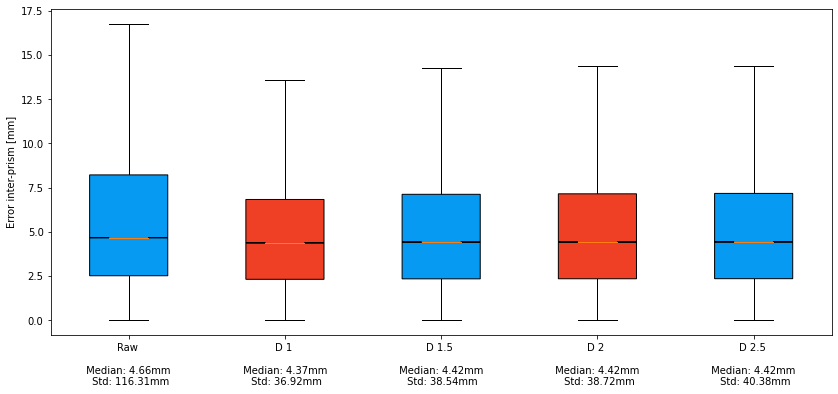

In [6]:
# Creating dataset
fig = plt.figure(figsize =(14, 6))
ax = fig.add_subplot(111)

box = ax.boxplot(result, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3, 4, 5], ["Raw \n\n Median: "+str(round(np.median(result[0]),2))+"mm \n Std: "+str(round(np.std(result[0]),2))+"mm",
                   "D 1 \n\n Median: "+str(round(np.median(result[1]),2))+"mm \n Std: "+str(round(np.std(result[1]),2))+"mm",
                   "D 1.5 \n\n Median: "+str(round(np.median(result[2]),2))+"mm \n Std: "+str(round(np.std(result[2]),2))+"mm",
                   "D 2 \n\n Median: "+str(round(np.median(result[3]),2))+"mm \n Std: "+str(round(np.std(result[3]),2))+"mm",
                   "D 2.5 \n\n Median: "+str(round(np.median(result[4]),2))+"mm \n Std: "+str(round(np.std(result[4]),2))+"mm"])
colors_box = ['#069AF3', '#EF4026','#069AF3', '#EF4026','#069AF3']

for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
        
ax.set_ylabel("Error inter-prism [mm]")
plt.show()
fig.savefig("./figs/comparison_error_distance-f-n-1-1-1-6-0-L.jpg")

In [7]:
ttfu = importlib.reload(ttfu)

result = []

path_type = 'raw/'
path_file_type = 'nf-1-6-0-L_'
dist_prism_raw, dist_prism_raw_all = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, path_file_type)
result.append(dist_prism_raw_all)

path_type = 'filtered/'
path_file_type = ['f-2-0.5-0.5-1-6-0-L_',
                  'f-2-1-1-1-6-0-L_',
                  'f-2-1.5-1.5-1-6-0-L_',
                  'f-2-2-2-1-6-0-L_',
                  ]

for i in path_file_type:
    print(i)
    dist_prism_filtered, dist_prism_filtered_all = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, i)
    result.append(dist_prism_filtered_all)

Results done !
f-2-0.5-0.5-1-6-0-L_
Results done !
f-2-1-1-1-6-0-L_
Results done !
f-2-1.5-1.5-1-6-0-L_
Results done !
f-2-2-2-1-6-0-L_
Results done !


/home/norlab/python-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


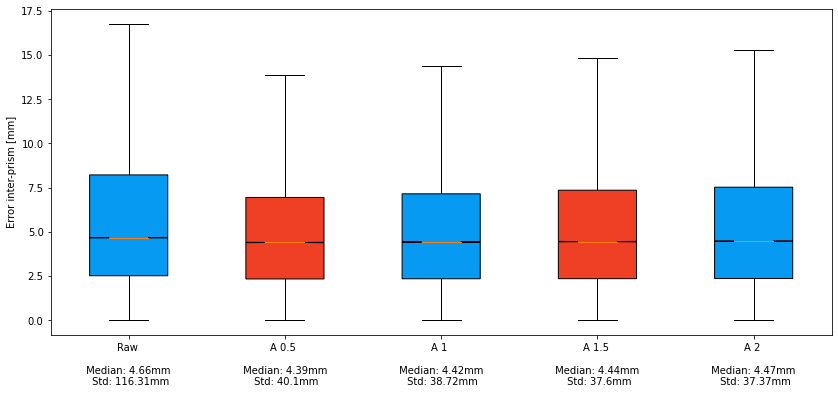

In [9]:
# Creating dataset
fig = plt.figure(figsize =(14, 6))
ax = fig.add_subplot(111)

box = ax.boxplot(result, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3, 4, 5], ["Raw \n\n Median: "+str(round(np.median(result[0]),2))+"mm \n Std: "+str(round(np.std(result[0]),2))+"mm",
                   "A 0.5 \n\n Median: "+str(round(np.median(result[1]),2))+"mm \n Std: "+str(round(np.std(result[1]),2))+"mm",
                   "A 1 \n\n Median: "+str(round(np.median(result[2]),2))+"mm \n Std: "+str(round(np.std(result[2]),2))+"mm",
                   "A 1.5 \n\n Median: "+str(round(np.median(result[3]),2))+"mm \n Std: "+str(round(np.std(result[3]),2))+"mm",
                   "A 2 \n\n Median: "+str(round(np.median(result[4]),2))+"mm \n Std: "+str(round(np.std(result[4]),2))+"mm"])
colors_box = ['#069AF3', '#EF4026','#069AF3', '#EF4026','#069AF3']

for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
        
ax.set_ylabel("Error inter-prism [mm]")
plt.show()
fig.savefig("./figs/comparison_error_angle-f-2-n-n-1-6-0-L.jpg")

In [22]:
ttfu = importlib.reload(ttfu)

path_type = 'filtered/'
path_file_type = ['f-2-1-1-0.5-6-0-L_',
                  'f-2-1-1-0.75-6-0-L_',
                  'f-2-1-1-1-6-0-L_',
                  'f-2-1-1-1.25-6-0-L_',
                  'f-2-1-1-1.5-6-0-L_',
                  'f-2-1-1-1.75-6-0-L_',
                  'f-2-1-1-2-6-0-L_']

result = []
for i in path_file_type:
    print(i)
    dist_prism_filtered, dist_prism_filtered_all = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, i)
    result.append(dist_prism_filtered_all)

f-2-1-1-0.5-6-0-L_
No data in file(s) ./data/prediction/TS/20220316/  !!
Results done !
f-2-1-1-0.75-6-0-L_
No data in file(s) ./data/prediction/TS/20220316/  !!
Results done !
f-2-1-1-1-6-0-L_
Results done !
f-2-1-1-1.25-6-0-L_
Results done !
f-2-1-1-1.5-6-0-L_
Results done !
f-2-1-1-1.75-6-0-L_
Results done !
f-2-1-1-2-6-0-L_
Results done !


/home/norlab/python-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


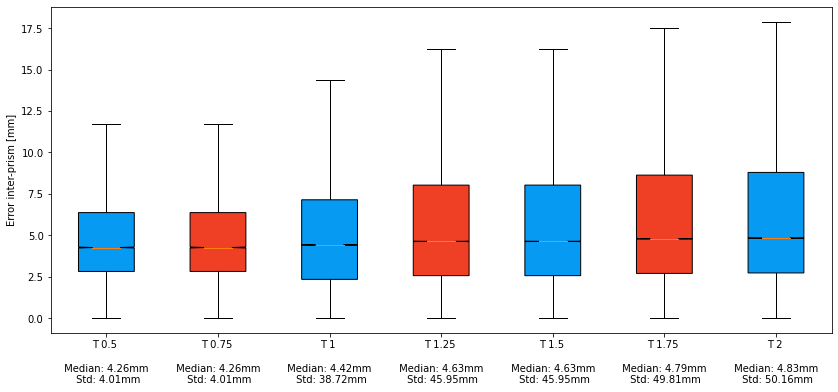

In [26]:
# Creating dataset
fig = plt.figure(figsize =(14, 6))
ax = fig.add_subplot(111)

box = ax.boxplot(result, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3, 4, 5, 6, 7], ["T 0.5 \n\n Median: "+str(round(np.median(result[0]),2))+"mm \n Std: "+str(round(np.std(result[0]),2))+"mm",
                   "T 0.75 \n\n Median: "+str(round(np.median(result[1]),2))+"mm \n Std: "+str(round(np.std(result[1]),2))+"mm",
                   "T 1 \n\n Median: "+str(round(np.median(result[2]),2))+"mm \n Std: "+str(round(np.std(result[2]),2))+"mm",
                   "T 1.25 \n\n Median: "+str(round(np.median(result[3]),2))+"mm \n Std: "+str(round(np.std(result[3]),2))+"mm",
                   "T 1.5 \n\n Median: "+str(round(np.median(result[4]),2))+"mm \n Std: "+str(round(np.std(result[4]),2))+"mm",
                   "T 1.75 \n\n Median: "+str(round(np.median(result[5]),2))+"mm \n Std: "+str(round(np.std(result[5]),2))+"mm",
                   "T 2 \n\n Median: "+str(round(np.median(result[6]),2))+"mm \n Std: "+str(round(np.std(result[6]),2))+"mm"])
colors_box = ['#069AF3', '#EF4026','#069AF3', '#EF4026','#069AF3', '#EF4026','#069AF3']

for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
        
ax.set_ylabel("Error inter-prism [mm]")
plt.show()
fig.savefig("./figs/comparison_error_time_interval-f-2-1-1-n-6-0-L.jpg")

In [25]:
for i in result:
    print(len(i))

35925
35925
260790
346227
346308
395565
404952


In [ ]:
print("Mean inter-prism [mm]: ", round(np.median(dist_prism_raw_all),2))
print("Std inter-prism [mm]: ", round(np.std(dist_prism_raw_all),2))
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.plot(dist_prism_raw_all, label="Raw", color="red", alpha=0.5)
ax = plt.gca()
ax.set_yscale('symlog')
ax.legend(loc='best')
ax.set_ylabel("Error [mm]")
ax.set_xlabel("Samples \n Mean inter-prism [mm]: " + str(round(np.median(dist_prism_raw_all),2))
             + "\n Std inter-prism [mm]: " + str(round(np.std(dist_prism_raw_all),2)))
limity = [0, 100000]
ax.set_ylim(limity)
plt.show()  
fig.tight_layout()
#fig.savefig("./figs/error_nf-1-6-0-L.jpg")
#fig.savefig("./figs/error_f-2-1-1-1-6-0-L.jpg")